파이토치 구성 요소
-	Torch: 메인 네임스페이스, 텐서 등의 다양한 수학 함수가 포함
-	Torch.autograd: 자동미분 기능을 제공하는 라이브러리
-	Torch.nm: 신경망 구축을 위한 데이터 구조나 레이어 등의 라이브러리
-	Torch.multiprocessing: 병렬처리 기능을 제공하는 라이브러리
-   torch.optim: SGD(Stochastic Gradient Descent)를 중심으로 한 파라미터 최적화 알고리즘 제공
-	Torch.utils: 데이터 조작 등 유틸리티 기능 제공
-	Torch.onnx: ONNX(Open Neural Network Exchange) 서로 다른 프레임워크 간의 모델을 공유할 때 사용


텐서(Tensors)
- 데이터 표현을 위한 기본 구조로 텐서(tensor)를 사용
- 텐서는 데이터를 담기 위한 컨테이너(container)로서 일반적으로 수치형 데이터를 저장
- 넘파이(NumPy)의 ndarray와 유사
- GPU를 사용한 연산 가속 가능 

In [4]:
import torch

torch.__version__

'1.13.1'

### 텐서 초기화와 데이터 타입

초기화 되지 않은 텐서

In [5]:
x = torch.empty(4,2)
print(x)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])


무작위로 초기화된 텐서

In [6]:
x = torch.rand(4,2)
print(x)

tensor([[0.7609, 0.2373],
        [0.9884, 0.3131],
        [0.8014, 0.4600],
        [0.8923, 0.0103]])


데이터 타입(dtype)이 long이고, 0으로 채워진 텐서

In [8]:
x = torch.zeros(4, 2, dtype=torch.long)
print(x)

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])


사용자가 입력한 값으로 텐서 초기화

In [9]:
x = torch.tensor([3, 2.3])
print(x)

tensor([3.0000, 2.3000])


2 X 4 크기, double 타입, 1로 채워진 텐서

In [11]:
x = x.new_ones(2, 4, dtype = torch.double)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


x와 같은 크기, float 타입, 무작위로 채워진 텐서

In [12]:
x = torch.randn_like(x, dtype=torch.float) # like : 모양이 같은 걸로 만들어줘
print(x)

tensor([[-0.7585, -0.5623,  0.0992,  0.3406],
        [-1.3371, -0.9335, -0.3848, -0.9038]])


텐서의 크기 계산

In [13]:
print(x.size())

torch.Size([2, 4])


### 데이터 타입(Data Type)

In [14]:
ft = torch.FloatTensor([1,2,3])
print(ft)
print(ft.dtype)

tensor([1., 2., 3.])
torch.float32


In [15]:
print(ft.short()) # 데이터 타입 바꿔주는 것
print(ft.int())
print(ft.long())

tensor([1, 2, 3], dtype=torch.int16)
tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3])


In [16]:
it = torch.IntTensor([1,2,3])

print(it)
print(it.dtype)

tensor([1, 2, 3], dtype=torch.int32)
torch.int32


In [17]:
print(it.float())
print(it.double())
print(it.half())

tensor([1., 2., 3.])
tensor([1., 2., 3.], dtype=torch.float64)
tensor([1., 2., 3.], dtype=torch.float16)


### CUDA Tensors
- `.to` 메소드를 사용하여 텐서를 어떠한 장치(cpu,gpu)로도 옮길 수 있음

In [18]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([0.9420])
0.9420244097709656
torch.float32


In [20]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
y = torch.ones_like(x, device=device)
print(y)
x = x.to(device)
print(x)
z = x + y
print(z)
print(z.to('cpu',torch.double))

cpu
tensor([1.])
tensor([0.9420])
tensor([1.9420])
tensor([1.9420], dtype=torch.float64)


### 다차원 텐서 표현

0D Tensor(Scalar)
- 하나의 숫자를 담고 있는 텐서(tensor)
- 축과 형상이 없음

In [21]:
t0 = torch.tensor(0)
print(t0.ndim)
print(t0.shape)
print(t0)

0
torch.Size([])
tensor(0)


1D Tensor(Vector)
- 값들을 저장한 리스트와 유사한 텐서
- 하나의 축이 존재

In [22]:
t1 = torch.tensor([1,2,3])
print(t1.ndim)
print(t1.shape)
print(t1)

1
torch.Size([3])
tensor([1, 2, 3])


2D Tensor(Matrix)
- 행렬과 같은 모양으로 두개의 축이 존재
- 일반적인 수치, 통계 데이터 셋이 해당
- 주로 샘플(y축 : samples)과 특성(x축 : features)을 가진 구조로 사용

In [23]:
t2 = torch.tensor([[1,2,3],
[4,5,6],
[7,8,9]])
print(t2.ndim)
print(t2.shape)
print(t2)

2
torch.Size([3, 3])
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


3D Tensor
- 큐브(cube)와 같은 모양으로 3개의 축이 존재
- 데이터가 연속된 시퀀스 데이터나 시간 축이 포함된 시계열 데이터에 해당
- 주식 가격 데이터 셋, 시간에 따른 질병 발병 데이터 등이 존재
- 주로 샘플(y축 : samples), 타임스텝(x축 : timesteps), 특성(z축 : features)을 가진 구조로 사용

In [24]:
t3 = torch.tensor([[[1,2,3],
                  [4,5,6],
                  [7,8,9]],
                  [[1,2,3],
                  [4,5,6],
                  [7,8,9]],
                  [[1,2,3],
                  [4,5,6],
                  [7,8,9]]])
print(t3.ndim)
print(t3.shape)
print(t3)

3
torch.Size([3, 3, 3])
tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])


4D Tensor
- 4개의 축
- 컬러 이미지 데이터가 대표적인 사례(흑백 이미지 데이터는 3D Tensor로 가능)
- 주로 샘플(samples), 높이(z축 : height), 너비(x축 : width), 컬러 채널(y축 : channel)을 가진 구조로 사용

5D Tensor
- 5개의 축
- 비디오 데이터가 대표적인 사례
- 주로 샘플(samples), 프리엠(frames), 높이(height), 너비(width), 컬러 채널(channel)을 가진 구조로 사용


### 텐서의 연산(Operations)
- 텐서에 대한 수학 연산, 삼각함수, 비트 연산, 비교 연산, 집계 등 제공

In [28]:
import math

a = torch.rand(1,2) * 2 - 1 
print(a)
print(torch.abs(a)) # 절대값
print(torch.ceil(a)) # 오름
print(torch.floor(a)) # 내림
print(torch.clamp(a, - 0.5, 0.5)) # 최소 -0.5 최대 0.5 넘으면 0.5로 고정

tensor([[-0.0038, -0.3378]])
tensor([[0.0038, 0.3378]])
tensor([[-0., -0.]])
tensor([[-1., -1.]])
tensor([[-0.0038, -0.3378]])


In [29]:
print(a)
print(torch.min(a))
print(torch.max(a))
print(torch.mean(a))
print(torch.std(a)) # 표준편차
print(torch.prod(a))
print(torch.unique(torch.tensor([1,2,3,1,2,2])))

tensor([[-0.0038, -0.3378]])
tensor(-0.3378)
tensor(-0.0038)
tensor(-0.1708)
tensor(0.2362)
tensor(0.0013)
tensor([1, 2, 3])


max와 min은 dim인자를 줄 경우 argmax와 argmin도 함께 리턴
- argmax: 최대값을 가진 인덱스
- argmin: 최소값을 가진 인덱스

In [31]:
x = torch.rand(2,2)
print(x)
print(x.max(dim=0))
print(x.max(dim=1))

tensor([[0.8322, 0.3375],
        [0.4624, 0.5246]])
torch.return_types.max(
values=tensor([0.8322, 0.5246]),
indices=tensor([0, 1]))
torch.return_types.max(
values=tensor([0.8322, 0.5246]),
indices=tensor([0, 1]))


In [32]:
x = torch.rand(2,2)
print(x)
print(x.min(dim=0))
print(x.min(dim=1))

tensor([[0.8631, 0.2699],
        [0.4088, 0.7515]])
torch.return_types.min(
values=tensor([0.4088, 0.2699]),
indices=tensor([1, 0]))
torch.return_types.min(
values=tensor([0.2699, 0.4088]),
indices=tensor([1, 0]))


In [33]:
x = torch.rand(2,2)
print(x)

y = torch.rand(2,2)
print(y)


tensor([[0.8694, 0.0840],
        [0.4511, 0.8036]])
tensor([[0.6507, 0.1978],
        [0.6379, 0.6216]])


`torch.add`: 덧셈

In [34]:
print( x + y)
print(torch.add(x,y))

tensor([[1.5201, 0.2818],
        [1.0890, 1.4252]])
tensor([[1.5201, 0.2818],
        [1.0890, 1.4252]])


결과 텐서를 인자로 제공

In [35]:
result = torch.empty(2,4)
torch.add(x,y, out=result)
print(result)

tensor([[1.5201, 0.2818],
        [1.0890, 1.4252]])


<ipython-input-35-4be145b6d329>:2: UserWarning: An output with one or more elements was resized since it had shape [2, 4], which does not match the required output shape [2, 2]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\Resize.cpp:24.)
  torch.add(x,y, out=result)


in-place 방식
- in-place 방식으로 텐서의 값을 변경하는 연산 뒤에는 "_"가 붙음
- `x.copy_(y)`, `x.t_()`

In [37]:
print(x)
print(y)
y.add_(x) # x값 더해서 y에 넣음
print(y)

tensor([[0.8694, 0.0840],
        [0.4511, 0.8036]])
tensor([[1.5201, 0.2818],
        [1.0890, 1.4252]])
tensor([[2.3895, 0.3659],
        [1.5401, 2.2288]])


`torch.sub`: 뺄셈

In [38]:
print(x)
print(y)
print(x-y)
print(torch.sub(x,y))
print(x.sub(y))

tensor([[0.8694, 0.0840],
        [0.4511, 0.8036]])
tensor([[2.3895, 0.3659],
        [1.5401, 2.2288]])
tensor([[-1.5201, -0.2818],
        [-1.0890, -1.4252]])
tensor([[-1.5201, -0.2818],
        [-1.0890, -1.4252]])
tensor([[-1.5201, -0.2818],
        [-1.0890, -1.4252]])


`torch.mul`: 곱셈

In [39]:
print(x)
print(y)
print(x*y)
print(torch.mul(x,y))
print(x.mul(y))

tensor([[0.8694, 0.0840],
        [0.4511, 0.8036]])
tensor([[2.3895, 0.3659],
        [1.5401, 2.2288]])
tensor([[2.0773, 0.0307],
        [0.6948, 1.7911]])
tensor([[2.0773, 0.0307],
        [0.6948, 1.7911]])
tensor([[2.0773, 0.0307],
        [0.6948, 1.7911]])


`torch.div`: 나눗셈

In [40]:
print(x)
print(y)
print(x / y)
print(torch.div(x,y))
print(x.div(y))

tensor([[0.8694, 0.0840],
        [0.4511, 0.8036]])
tensor([[2.3895, 0.3659],
        [1.5401, 2.2288]])
tensor([[0.3638, 0.2296],
        [0.2929, 0.3606]])
tensor([[0.3638, 0.2296],
        [0.2929, 0.3606]])
tensor([[0.3638, 0.2296],
        [0.2929, 0.3606]])


`torch.mm`: 내적(dot product)

In [41]:
print(x)
print(y)
print(torch.matmul(x,y))
z = torch.mm(x,y)
print(z)
print(torch.svd(z))

tensor([[0.8694, 0.0840],
        [0.4511, 0.8036]])
tensor([[2.3895, 0.3659],
        [1.5401, 2.2288]])
tensor([[2.2067, 0.5053],
        [2.3156, 1.9561]])
tensor([[2.2067, 0.5053],
        [2.3156, 1.9561]])
torch.return_types.svd(
U=tensor([[-0.5848, -0.8112],
        [-0.8112,  0.5848]]),
S=tensor([3.6857, 0.8537]),
V=tensor([[-0.8598, -0.5107],
        [-0.5107,  0.8598]]))


### 텐서의 조작(Manipulations)

인덱싱(indexing): Numpy처럼 인덱싱 형태로 사용 가능

In [43]:
x = torch.Tensor([[1,2], [3,4]])
print(x)

print(x[0,0])
print(x[0,1])
print(x[1,0])
print(x[1,1])

print(x[:,0])
print(x[:,1])

print(x[0,:])
print(x[1,:])

tensor([[1., 2.],
        [3., 4.]])
tensor(1.)
tensor(2.)
tensor(3.)
tensor(4.)
tensor([1., 3.])
tensor([2., 4.])
tensor([1., 2.])
tensor([3., 4.])


`view`: 텐서의 크기(size)나 모양(shape)을 변경
- 기본적으로 변경 전과 후에 텐서 안의 원소 개수가 유지되어야 함
- -1로 설정되면 계산을 통해 해당 크기 값을 유추

In [45]:
x = torch.randn(4,5)
print(x)

y=x.view(20)
print(y)

z = x.view(5, -1)
print(z)

tensor([[-1.1122, -1.1803,  0.1348, -1.1147,  1.4711],
        [-0.3835, -0.6229, -2.7197,  2.0111,  1.7993],
        [-0.4613,  0.6995, -0.5591, -0.5271, -0.3763],
        [-1.3425,  0.2071, -1.2250, -0.1064,  0.1219]])
tensor([-1.1122, -1.1803,  0.1348, -1.1147,  1.4711, -0.3835, -0.6229, -2.7197,
         2.0111,  1.7993, -0.4613,  0.6995, -0.5591, -0.5271, -0.3763, -1.3425,
         0.2071, -1.2250, -0.1064,  0.1219])
tensor([[-1.1122, -1.1803,  0.1348, -1.1147],
        [ 1.4711, -0.3835, -0.6229, -2.7197],
        [ 2.0111,  1.7993, -0.4613,  0.6995],
        [-0.5591, -0.5271, -0.3763, -1.3425],
        [ 0.2071, -1.2250, -0.1064,  0.1219]])


`item`: 텐서에 값이 단 하나라도 존재하면 숫자 값을 얻을 수 있음

In [46]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([0.4157])
0.4157187044620514
torch.float32


스칼라값 하나만 존재해야 `item()` 사용 가능

In [47]:
x = torch.randn(2)
print(x)
print(x.item())
print(x.dtype)

tensor([-0.1337,  1.2511])


ValueError: only one element tensors can be converted to Python scalars

`squeeze`: 차원을 축소(제거)

In [48]:
tensor = torch.rand(1, 3, 3)
print(tensor)
print(tensor.shape)

tensor([[[0.2504, 0.4762, 0.9858],
         [0.1698, 0.0735, 0.3427],
         [0.2871, 0.4365, 0.4270]]])
torch.Size([1, 3, 3])


In [49]:
t = tensor.squeeze()
print(t)
print(t.shape)

tensor([[0.2504, 0.4762, 0.9858],
        [0.1698, 0.0735, 0.3427],
        [0.2871, 0.4365, 0.4270]])
torch.Size([3, 3])


`unsqueeze`: 차원을 증가(생성)

In [50]:
t = torch.rand(3,3)
print(t)
print(t.shape)

tensor([[0.2904, 0.8282, 0.1999],
        [0.6144, 0.7651, 0.4584],
        [0.9334, 0.2621, 0.8613]])
torch.Size([3, 3])


In [51]:
tensor = t.unsqueeze(dim=0)
print(tensor)
print(tensor.shape)

tensor([[[0.2904, 0.8282, 0.1999],
         [0.6144, 0.7651, 0.4584],
         [0.9334, 0.2621, 0.8613]]])
torch.Size([1, 3, 3])


In [52]:
tensor = t.unsqueeze(dim=2)
print(tensor)
print(tensor.shape)

tensor([[[0.2904],
         [0.8282],
         [0.1999]],

        [[0.6144],
         [0.7651],
         [0.4584]],

        [[0.9334],
         [0.2621],
         [0.8613]]])
torch.Size([3, 3, 1])


`stack`: 텐서간 결합

In [53]:
x = torch.FloatTensor([1,4])
print(x)
y = torch.FloatTensor([2,5])
print(y)
z = torch.FloatTensor([3,6])
print(z)

print(torch.stack([x,y,z]))

tensor([1., 4.])
tensor([2., 5.])
tensor([3., 6.])
tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


`cat`: 텐서를 결합하는 메소드(concatenate)
- 넘파이의 stack과 유사하지만, 쌓을 dim이 존재해야함
- 해당 차원을 늘려준 후 결합

In [54]:
a = torch.randn(1,3,3)
print(a)
b = torch.randn(1,3,3)
print(b)
c = torch.cat((a,b),dim=0)
print(c)
print(c.size())

tensor([[[-0.3440,  0.9159, -0.1541],
         [ 1.7350,  1.9162,  0.0481],
         [-1.5601,  0.9435, -1.6196]]])
tensor([[[-2.6865e-01,  2.0353e+00, -7.1368e-01],
         [ 2.1876e-01,  1.8690e-03,  1.4029e+00],
         [ 3.9005e-01, -3.9864e-01,  1.5371e-01]]])
tensor([[[-3.4397e-01,  9.1590e-01, -1.5412e-01],
         [ 1.7350e+00,  1.9162e+00,  4.8110e-02],
         [-1.5601e+00,  9.4355e-01, -1.6196e+00]],

        [[-2.6865e-01,  2.0353e+00, -7.1368e-01],
         [ 2.1876e-01,  1.8690e-03,  1.4029e+00],
         [ 3.9005e-01, -3.9864e-01,  1.5371e-01]]])
torch.Size([2, 3, 3])


In [55]:
c = torch.cat((a,b),dim=1)
print(c)
print(c.size())

tensor([[[-3.4397e-01,  9.1590e-01, -1.5412e-01],
         [ 1.7350e+00,  1.9162e+00,  4.8110e-02],
         [-1.5601e+00,  9.4355e-01, -1.6196e+00],
         [-2.6865e-01,  2.0353e+00, -7.1368e-01],
         [ 2.1876e-01,  1.8690e-03,  1.4029e+00],
         [ 3.9005e-01, -3.9864e-01,  1.5371e-01]]])
torch.Size([1, 6, 3])


In [56]:
c = torch.cat((a,b),dim=2)
print(c)
print(c.size())

tensor([[[-3.4397e-01,  9.1590e-01, -1.5412e-01, -2.6865e-01,  2.0353e+00,
          -7.1368e-01],
         [ 1.7350e+00,  1.9162e+00,  4.8110e-02,  2.1876e-01,  1.8690e-03,
           1.4029e+00],
         [-1.5601e+00,  9.4355e-01, -1.6196e+00,  3.9005e-01, -3.9864e-01,
           1.5371e-01]]])
torch.Size([1, 3, 6])


`chunk`: 텐서를 여러 개로 나눌 때 사용(몇 개로 나눌 것인가?)

In [57]:
tensor = torch.rand(3,6)
print(tensor)

t1, t2, t3 = torch.chunk(tensor, 3, dim = 1) # 하나의 텐서를 몇개의 단위로 나눌 것인지 3
print(t1)
print(t2)
print(t3)

tensor([[0.4265, 0.7666, 0.6045, 0.7586, 0.0143, 0.7098],
        [0.9030, 0.3743, 0.9422, 0.2180, 0.9089, 0.7105],
        [0.5401, 0.2746, 0.6473, 0.2112, 0.0393, 0.4016]])
tensor([[0.4265, 0.7666],
        [0.9030, 0.3743],
        [0.5401, 0.2746]])
tensor([[0.6045, 0.7586],
        [0.9422, 0.2180],
        [0.6473, 0.2112]])
tensor([[0.0143, 0.7098],
        [0.9089, 0.7105],
        [0.0393, 0.4016]])


`split`: chunk와 동일한 기능이지만 조금 다름(텐서의 크기는 몇인가?)

In [58]:
tensor = torch.rand(3,6)
t1, t2 = torch.split(tensor, 3, dim = 1 )  # 하나의 텐서가 크기가 몇이냐 하는 3

print(tensor)
print(t1)
print(t2)

tensor([[0.9681, 0.5290, 0.2354, 0.4157, 0.0380, 0.2518],
        [0.0867, 0.7484, 0.2379, 0.2737, 0.1649, 0.4742],
        [0.3966, 0.2428, 0.0207, 0.8659, 0.2316, 0.2886]])
tensor([[0.9681, 0.5290, 0.2354],
        [0.0867, 0.7484, 0.2379],
        [0.3966, 0.2428, 0.0207]])
tensor([[0.4157, 0.0380, 0.2518],
        [0.2737, 0.1649, 0.4742],
        [0.8659, 0.2316, 0.2886]])


torch <-> numpy
- Torch Tensor(텐서)를 NumPy array(배열)로 변환 가능
    - `numpy()`
    - `from_numpy()`
- Tensor가 CPU상에 있다면 NumPy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변함

In [59]:
a = torch.ones(7)
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [60]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1. 1. 1.]


In [61]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2. 2. 2.]


In [62]:
import numpy as np

a = np.ones(7)
b = torch.from_numpy(a)
np.add(a, 1, out = a)
print(a)
print(b)

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


### AUTOGRAD(자동 미분)
- torch.autograd 패키지는 Tensor의 모든 연산에 대해 자동 미분 제공
- 이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻
- backprop를 위한 위한 미분 값을 자동으로 계산

`requires_grad` 속성을 `True`로 설정하면, 해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작   
기록을 추적하는 것을 중단하게 하려면, `.detach()`를 호출하여 연산기록으로부터 분리

In [63]:
a = torch.randn(3,3)
a = a * 3
print(a)
print(a.requires_grad)

tensor([[ 2.0159,  5.3622, -3.0375],
        [ 2.8010, -5.2019,  0.5018],
        [ 1.6168, -4.0976,  4.3146]])
False


`requires_grad_(...)`는 기존 텐서의 requires_grad 값을 바꿔치기(in-place)하여 변경   
`grad_fn`: 미분 값을 계산한 함수에 대한 정보 저장(어떤 함수에 대해서 backprop 했는지)

In [64]:
a.requires_grad_(True) # _를 뒤에 붙이면 in-place
print(a.requires_grad)

b = (a * a).sum() # a에 a를 곱하고 더해줌
print(b)
print(b.grad_fn)


True
tensor(115.2203, grad_fn=<SumBackward0>)


### 기울기(Gradient)

In [65]:
x = torch.ones(3,3,requires_grad=True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [66]:
y = x + 5
print(y)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [67]:
z = y * y
out = z.mean()
print(z, out)

tensor([[36., 36., 36.],
        [36., 36., 36.],
        [36., 36., 36.]], grad_fn=<MulBackward0>) tensor(36., grad_fn=<MeanBackward0>)


계산이 완료된 후, `.backward()`를 호출하면 자동으로 역전파 계산이 가능하고, `.grad` 속성에 누적됨

In [68]:
print(out)
out.backward()

tensor(36., grad_fn=<MeanBackward0>)


grad: data가 거쳐온 layer에 대한 미분 값 저장

In [69]:
print(x)
print(x.grad)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333]])


In [70]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([268.8491, 963.9922, 634.4031], grad_fn=<MulBackward0>)


In [71]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


`with torch.no_grad()`를 사용하여 기울기의 업데이트를 하지 않음   
기록을 추적하는 것을 방지하기 위해 코드 블럭을 `with torch.no_grad()`로 감싸면 기울기 계산은 필요없지만, `requires_grad = True`로 설정되어 학습 가능한 매개 변수를 갖는 모델을 평가(evaluate)할 때 유용

In [72]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


`detach()`: 내용물(content)은 같지만 `require_grad`가 다른 새로운 Tensor를 가져올 때

In [73]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all())

True
False
tensor(True)


### 자동 미분 흐름 예제
- 계산 흐름   
a->b->c->out   
$\frac{\partial out}{\partial a}$ = ?
- backward()를 통해 a<-b<-c<-out을 계산하면 $\frac{\partial out}{\partial a}$ 값이 a.grad에 채워짐


In [74]:
a = torch.ones(2, 2, requires_grad=True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [75]:
print(a.data)
print(a.grad)
print(a.grad_fn)

tensor([[1., 1.],
        [1., 1.]])
None
None


b = a + 2

In [76]:
b = a + 2
print(b)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


c = $b^2$

In [77]:
c = b ** 2
print(c)

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)


In [78]:
out = c.sum()
print(out)

tensor(36., grad_fn=<SumBackward0>)


In [79]:
print(out)
out.backward()

tensor(36., grad_fn=<SumBackward0>)


a의 grad_fn이 None인 이유는 직접적으로 계산한 부분이 없었기 때문

In [80]:
print(a.data)
print(a.grad)
print(a.grad_fn)

tensor([[1., 1.],
        [1., 1.]])
tensor([[6., 6.],
        [6., 6.]])
None


In [81]:
print(b.data)
print(b.grad)
print(b.grad_fn)

tensor([[3., 3.],
        [3., 3.]])
None


<ipython-input-81-7222c1aec66c>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\cb\pytorch_1000000000000\work\build\aten\src\ATen/core/TensorBody.h:485.)
  print(b.grad)


In [82]:
print(c.data)
print(c.grad)
print(c.grad_fn)

tensor([[9., 9.],
        [9., 9.]])
None


<ipython-input-82-f6ca42a4f63f>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\cb\pytorch_1000000000000\work\build\aten\src\ATen/core/TensorBody.h:485.)
  print(c.grad)


In [83]:
print(out.data)
print(out.grad)
print(out.grad_fn)

tensor(36.)
None


<ipython-input-83-85e75c577388>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\cb\pytorch_1000000000000\work\build\aten\src\ATen/core/TensorBody.h:485.)
  print(out.grad)


### 데이터 준비

파이토치에서는 데이터 준비를 위해 torch.utils.data의 Datasets와 DataLoader 사용 가능
- Dataset에는 다양한 데이터셋이 존재(MNIST, FashionMNIST, CIFAR10,...)
    - Vision Dataset: https://pytorch.org/vision/stable/datasets.html
    - Test Dataset: https://pytorch.org/text/stable/datasets.html
    - Audio Dataset: https://pytorch.org/audio/stable/datasets.html
- DataLoader와 Dataset을 통해 batch_size, train 여부, transform등을 인자로 넣어 데이터를 어떻게 load할 것인지 정해줄 수 있음

In [84]:
from torch.utils.data import Dataset, DataLoader

토치비전(torchvision)은 파이토치에서 제공하는 데이터셋들이 모여있는 패키지
- transforms: 전처리할 때 사용하는 메소드 (https://pytorch.org/docs/stable/torchvision/transforms.html)
- transforms에서 제공하는 클래스 이외는 일반적으로 클래스를 따로 만들어 전처리 단계를 진행

In [85]:
import torchvision.transforms as transforms
from torchvision import datasets

DataLoader의 인자로 들어갈 transform을 미리 정의할 수 있고, Compose를 통해 리스트 안에 순서대로 전처리 진행   
ToTensor()를 하는 이유는 torchvision이 PIL Image형태로만 입력을 받기 때문에 데이터 처리를 위해서 Tensor형으로 변환 필요

In [86]:
mnist_transform = transforms.Compose([transforms.ToTensor(), 
                                      transforms.Normalize(mean=0.5, std=(1.0))])

In [87]:
trainset = datasets.MNIST(root='/content/', 
                          train = True, 
                          download = True, 
                          transform=mnist_transform)

testset = datasets.MNIST(root='/content/',
                         train = False,  
                         download = True,
                         transform=mnist_transform)


                                    

DataLoader는 데이터 전체를 보관했다가 실제 모델 학습을 할 때 batch_size 크기만

In [88]:
train_loader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=8, shuffle=False, num_workers=2)

In [91]:
dataiter = iter(train_loader)
images, labels = next(dataiter) # dataiter.next()로 사용했는데 안되서 찾아서 해봄
images.shape, labels.shape

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

In [92]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

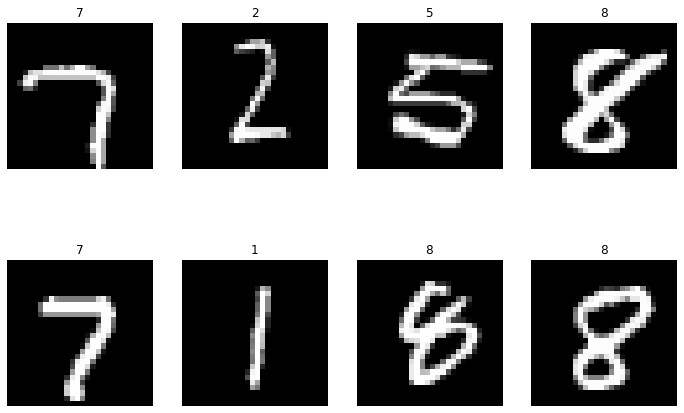

In [93]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(12,8))
cols, rows = 4, 2
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(trainset), size=(1, )).item()
    img, label = trainset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray')
plt.show()

### 신경망 구성
- 레이어(layer): 신경망의 핵심 데이터 구조로 하나 이상의 텐서를 입력받아 하나 이상의 텐서를 출력
- 모듈(module): 한 개 이상의 계층이 모여서 구성
- 모델(model): 한 개 이상의 모듈이 모여서 구성

### torch.nn 패키지
주로 가중치(weights), 편향(bias)값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때 사용(weight 값들을 직접 선언 안함)   
https://pytorch.org/docs/stable/nn.html

In [94]:
import torch.nn as nn

nn.Linear 계층 예제

In [95]:
input = torch.randn(128, 20)
print(input)

m = nn.Linear(20,30)
print(m)

output = m(input)
print(output)
print(output.size())

tensor([[-9.6898e-03,  7.7957e-02,  8.2647e-01,  ..., -5.1656e-02,
         -9.3013e-01, -1.1412e+00],
        [ 2.1072e-01, -1.5066e+00, -4.6043e-01,  ...,  8.1622e-01,
         -1.2218e+00,  1.4624e+00],
        [-5.5013e-01,  1.9704e+00,  3.0603e-01,  ...,  3.3847e-02,
          4.1525e-01, -8.9526e-01],
        ...,
        [-3.6765e-01, -1.4763e+00, -1.2905e+00,  ..., -8.2585e-01,
         -3.6883e-01,  5.4625e-01],
        [ 4.6463e-01, -5.3026e-01,  1.4292e+00,  ...,  5.3387e-01,
          7.5211e-01,  1.2334e+00],
        [ 2.6849e-01, -3.7858e-01,  8.5787e-01,  ..., -7.9843e-01,
          1.1547e+00,  1.1182e-03]])
Linear(in_features=20, out_features=30, bias=True)
tensor([[-0.1178,  0.7874,  0.3382,  ..., -0.5775,  0.0791, -0.0730],
        [-0.2686, -0.3939,  0.1273,  ..., -0.6421,  0.1879, -0.7937],
        [ 0.6690, -0.1852, -0.1378,  ...,  1.1815, -0.6751,  0.5277],
        ...,
        [ 0.2048,  0.6096,  0.9436,  ..., -1.2832,  0.8594,  0.6279],
        [-0.2434, -0.518

nn.Conv2d 계층 예제

In [96]:
input = torch.randn(20, 16, 50, 100)
print(input.size())

torch.Size([20, 16, 50, 100])


In [97]:
m = nn.Conv2d(16, 33, 3, stride=2)
m = nn.Conv2d(16, 33, (3,5), stride=2, padding =(4,2))
m = nn.Conv2d(16, 33, (3,5), stride=2, padding =(4,2), dilation=(3,1))
print(m)

Conv2d(16, 33, kernel_size=(3, 5), stride=(2, 2), padding=(4, 2), dilation=(3, 1))


In [98]:
output = m(input)
print(output.size())

torch.Size([20, 33, 26, 50])


### 컨볼루션 레이어(Convolution Layers)

nn.Conv2d 예제
- in_channels: channel의 갯수
- out_channels: 출력 채널의 갯수
- kernel_size: 커널(필터) 사이즈

In [99]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [100]:
layer = nn.Conv2d(1, 20, 5, 1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

weight 확인

In [101]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

weight는 `detach()`를 통해 꺼내줘야 `numpy()`변환이 가능

In [102]:
weight = weight.detach()

In [103]:
weight = weight.numpy()
weight.shape

(20, 1, 5, 5)

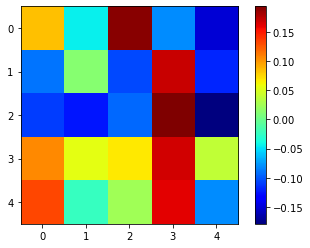

In [104]:
plt.imshow(weight[0, 0, :, :], 'jet')
plt.colorbar()
plt.show()

In [105]:
print(images.shape)
print(images[0].size())

input_image = torch.squeeze(images[0])
print(input_image.size())

torch.Size([8, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


In [106]:
input_data = torch.unsqueeze(images[0], dim=0)
print(input_data.size())

output_data = layer(input_data)
output = output_data.data
output_arr = output.numpy()
output_arr.shape

torch.Size([1, 1, 28, 28])


(1, 20, 24, 24)

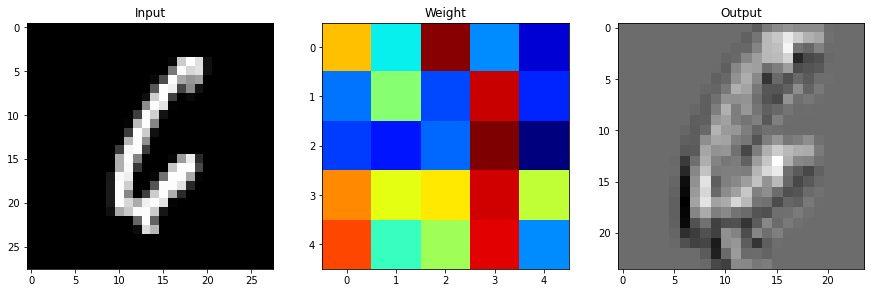

In [107]:
plt.figure(figsize =(15,30))

plt.subplot(131)
plt.title("Input")
plt.imshow(input_image, 'gray')

plt.subplot(132)
plt.title('Weight')
plt.imshow(weight[0,0,:,:], 'jet')

plt.subplot(133)
plt.title("Output")
plt.imshow(output_arr[0,0,:,:], 'gray')
plt.show()

### 풀링 레이어(Pooling layers)
- F.max_pool2d
    - stride
    - kernel_size
- torch.nn.MaxPool2d도 많이 사용

In [108]:
import torch.nn.functional as F

pool = F.max_pool2d(output, 2, 2)
pool.shape

torch.Size([1, 20, 12, 12])

- MaxPool Layer는 weight가 없기 때문에 바로 `numpy()`변환 가능

In [109]:
pool_arr = pool.numpy()
pool_arr.shape

(1, 20, 12, 12)

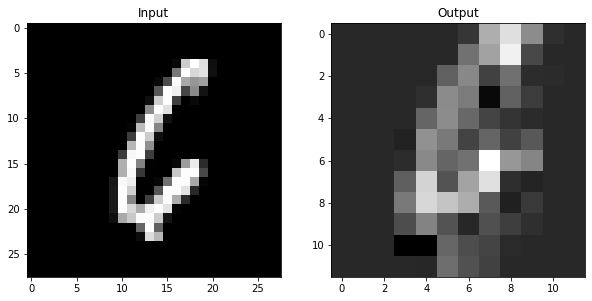

In [110]:
plt.figure(figsize =(10,15))

plt.subplot(121)
plt.title("Input")
plt.imshow(input_image, 'gray')

plt.subplot(122)
plt.title('Output')
plt.imshow(pool_arr[0,0,:,:], 'gray')
plt.show()

### 선형 레이어(Linear layers)

1d만 가능하므로 `.view()`를 통해 1D로 펼쳐줘야함

In [111]:
flatten = input_image.view(1, 28 * 28)
flatten.shape

torch.Size([1, 784])

In [112]:
lin = nn.Linear(784, 10)(flatten)
lin.shape

torch.Size([1, 10])

In [113]:
lin

tensor([[ 0.1813, -0.4889, -0.2746, -0.2441, -0.0237,  0.3131, -0.0535, -0.4336,
          0.0514, -0.1324]], grad_fn=<AddmmBackward0>)

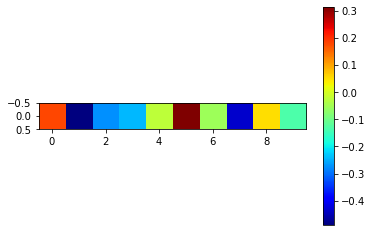

In [114]:
plt.imshow(lin.detach().numpy(), 'jet')
plt.colorbar()
plt.show()

### 비선형 활성화(Non-linear Activations)

F.softmax와 같이 활성화 함수 등

In [115]:
with torch.no_grad():
    flatten = input_image.view(1, 28 * 28)
    lin = nn.Linear(784, 10)(flatten)
    softmax = F.softmax(lin, dim=1)
softmax

tensor([[0.0800, 0.1118, 0.0831, 0.0732, 0.0986, 0.0832, 0.1104, 0.1640, 0.1102,
         0.0857]])

In [117]:
np.sum(softmax.numpy()) # 모든 종류(10)의 합이 100%, 즉 1이 되게 함

1.0

F.relu
- ReLU 함수를 적용하는 레이어
- `nn.ReLU`로도 사용 가능

In [118]:
inputs = torch.randn(4, 3, 28, 28).to(device)
inputs.shape

torch.Size([4, 3, 28, 28])

In [119]:
layer = nn.Conv2d(3, 20, 5, 1).to(device)
output = F.relu(layer(inputs))
output.shape

torch.Size([4, 20, 24, 24])

### 모델 정의

#### nn.Module 상속 클래스 정의
- `nn.Module`을 상속 받는 클래스 정의
- `__init__()`: 모델에서 사용될 모듈과 활성화 함수 등을 정의
- `forward()`: 모델에서 실행되어야하는 연상을 정의

In [120]:
class Model(nn.Module):
    def __init__(self, inputs):
        super(Model, self).__init__()
        self.layer = nn.Linear(inputs, 1)
        self.activation = nn.Sigmoid()

    def forward(self, x):
        x = self.layer(x)
        x = self.activation(x)
        return x

In [122]:
model = Model(1)
print(list(model.children()))
print(list(model.modules()))

[Linear(in_features=1, out_features=1, bias=True), Sigmoid()]
[Model(
  (layer): Linear(in_features=1, out_features=1, bias=True)
  (activation): Sigmoid()
), Linear(in_features=1, out_features=1, bias=True), Sigmoid()]


#### nn.Sequential을 이용한 신경망 정의
- `nn.Sequential` 객체로 그 안에 각 모듈을 순차적으로 실행
- `__init__()`에서 사용할 네트워크 모델들을 `nn.Sequential`로 정의 가능
- `forward()`에서 실행되어야 할 계산을 가독성 높게 작성 가능

In [123]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )

        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=30, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )

        self.layer3 = nn.Sequential(
            nn.Linear(in_features=30*5*5, out_features=10, bias=True),
            nn.ReLU(inplace=True)
        )

        def forward(self, x):
            x = self.layer1(x)
            x = self.layer2(x)
            x = x.view(x.shape[0],-1)
            x = self.layer3(x)
            return x

In [124]:
model = Model()
print(list(model.children()))
print(list(model.modules()))

[Sequential(
  (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Linear(in_features=750, out_features=10, bias=True)
  (1): ReLU(inplace=True)
)]
[Model(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(in_features=750, out_features=10, bias=True)
    (1): ReLU(inplace=True)
  )
), Sequential(
  (

파이토치 사전 학습 모델
- https://pytorch.org/vision/stable/models.html

### 모델 파라미터

#### 손실 함수(Loss function)
- 예측 값과 실제 값 사이의 오차 측정
- 학습이 진행되면서 해당 과정이 얼마나 잘 되고 있는지 나타내는 지표
- 모델이 훈련되는 동안 최소화될 값으로 주어진 문제에 대한 성공 지표
- 손실 함수에 따른 결과를 통해 학습 파라미터를 조정
- 최적화 이론에서 최소화 하고자 하는 함수
- 미분 가능한 함수 사용
- 파이토치의 주요 손실 함수
    - `torh.nn.BCELoss`: 이진 분류를 위해 사용
    - `torch.nn.CrossEntropyLoss`: 다중 클래스 분류를 위해 사용
    - `torch.nn.MSELoss`: 회귀 모델에서 사용

In [125]:
criterion = nn.MSELoss()
criterion = nn.CrossEntropyLoss()

#### 옵티마이저(Optimizer)
- 손실 함수를 기반으로 모델이 어떻게 업데이트되어야 하는지결정(특정 종류의 확률적 경사 하강법 구현)
- optimizer는 `step()`을 통해 전달 받은 파라미터를 모델 업데이트
- 모든 옵티마이저의 기본으로 `torch.optim.Optimizer(params, defaults)` 클래스 사용
- `zero_grad()`를 이용해 옵티마이저에 사용된 파라미터들의 기울기를 0으로 설정
- `torch.optim.lr_scheduler`를 이용해 에포크(epochs)에 따라 학습률(learning rate) 조절
- 파이토치의 주요 옵티마이저: `optim.Adadelta`, `optim.Adagrad`, `optim.RMSprop`, `optim.SGD`

#### 학습률 스케줄러(Learning rate scheduler)
- 학습시 특정 조건에 따라 학습률을 조정하여 최적화 진행
- 일정 횟수 이상이 되면 학습률을 감소(decay)시키거나 전역 최소점(global minimum) 근처에 가면 학습률을 줄이는 등
- 파이토치의 학습률 스케줄러 종류
    - `optim.lr_scheduler.LambdaLR`:람다(lambda)함수를 이용해 그 결과를 학습률로 설정
    - `optim.lr_scheduler.StepLR`: 단계(step)마다 학습률을 감마(gamma) 비율만큼 감소
    - `optim.lr_scheduler.MultiStepLR`: `StepLR`과 비슷하지만 특정 단계가 아니라 지정된 에포크에만 감마 비율로 감소
    - `optim.lr_scheduler.ExponentialLR`: 에포크마다 이전 학습률에 감마만큼 곱함
    - `optim.lr_scheduler.CosineAnnealingLR`: 학슬률을 코사인(cosine)함수의 형태처럼 변화시켜 학습률이 커지기도 하고 작아지기도 함
    - `optim.lr_scheduler.ReduceLROnPlateau`: 학습이 잘되는지 아닌지에 따라 동적으로 학습률 변화

#### 지표(Metrics)
- 모델의 학습과 테스트 단계를 모니터링

In [126]:
#!pip install torchmetrics
import torchmetrics

preds = torch.randn(10, 5).softmax(dim=1)
target = torch.randn(5, (10, ))
print(preds, target)

acc = torchmetrics.functional.accuracy(preds, target)
print(acc)

TypeError: randn(): argument 'size' must be tuple of ints, but found element of type tuple at pos 2

In [128]:
metric = torchmetrics.Accuracy()

n_batches = 10
for i in range(n_batches):
    preds = torch.randn(10, 5).softmax(dim=1)
    target = torch.randn(5, (10, ))

acc = metric(preds, target)
print(acc)

acc = metric.compute()
print(acc)

TypeError: __new__() missing 1 required positional argument: 'task'

### 선형 회귀 모델(Linear Regression Model)

#### 데이터 생성

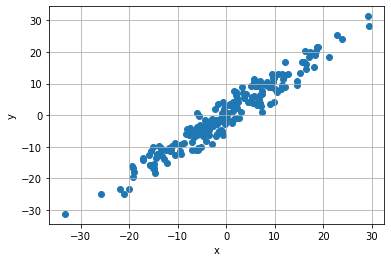

In [129]:
X = torch.randn(200, 1) * 10
y = X + 3 * torch.randn(200,1)
plt.scatter(X.numpy(), y.numpy())
plt.ylabel('y')
plt.xlabel('x')
plt.grid()
plt.show()

#### 모델 정의 및 파라미터

In [134]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)
    
    def forward(self, x):
        pred = self.linear(x)
        return pred


In [135]:
model = LinearRegressionModel()
print(model)
print(list(model.parameters()))

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
[Parameter containing:
tensor([[-0.6218]], requires_grad=True), Parameter containing:
tensor([-0.6986], requires_grad=True)]


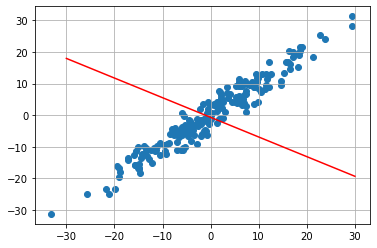

In [137]:
w, b = model.parameters()

w1, b1 = w[0][0].item() , b[0].item()

x1 = np.array([-30,30])
y1 = w1 * x1 + b1

plt.plot(x1, y1, 'r')
plt.scatter(X,y)
plt.grid()
plt.show()

#### 손실 함수 및 옵티마이저

In [138]:
import torch.optim as optim

criterion = nn.MSELoss()
optimzer = optim.SGD(model.parameters(), lr=0.001)

#### 모델 학습

In [139]:
epochs = 100
losses = []

for epoch in range(epochs):
    optimzer.zero_grad()

    y_pred = model(X)
    loss = criterion(y_pred, y)
    losses.append(loss.item())
    loss.backward()

    optimzer.step()

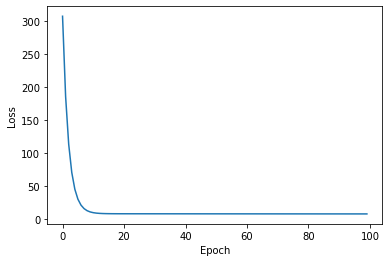

In [140]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

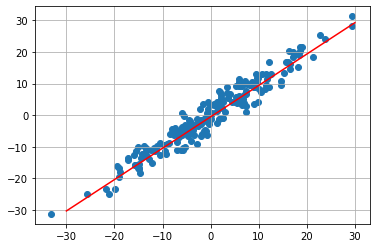

In [141]:
w1, b1 = w[0][0].item() , b[0].item()

x1 = np.array([-30,30])
y1 = w1 * x1 + b1

plt.plot(x1, y1, 'r')
plt.scatter(X,y)
plt.grid()
plt.show()

### FashionMNIST 분류 모델

GPU 설정

In [142]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

#### 데이터 로드

In [143]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, ), (0.5))])

In [144]:
trainset = datasets.FashionMNIST(root ='/content/',
                                 train=True, download=True,
                                 transform=transform)

testset = datasets.FashionMNIST(root ='/content/',
                                 train=False, download=True,
                                 transform=transform)

100.0%


Extracting /content/FashionMNIST\raw\train-images-idx3-ubyte.gz to /content/FashionMNIST\raw



100.0%


Extracting /content/FashionMNIST\raw\train-labels-idx1-ubyte.gz to /content/FashionMNIST\raw



100.0%


Extracting /content/FashionMNIST\raw\t10k-images-idx3-ubyte.gz to /content/FashionMNIST\raw



100.0%

Extracting /content/FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to /content/FashionMNIST\raw



In [145]:
train_loader = DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)
test_loader = DataLoader(trainset, batch_size=128, shuffle=False, num_workers=2)

In [146]:
images, labels = next(iter(train_loader))
images.shape, labels.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

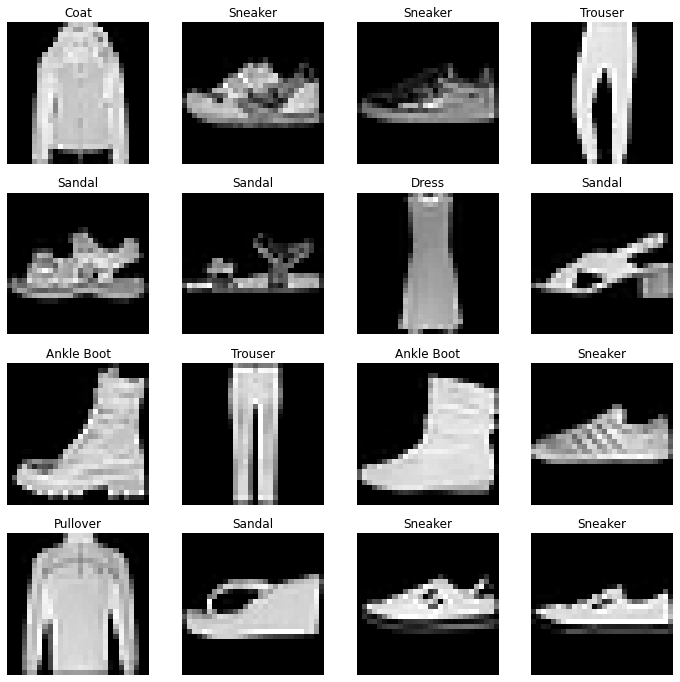

In [147]:
labels_map = {
    0: 'T-Shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot'
}

figure = plt.figure(figsize=(12,12))
cols, rows = 4, 4
for i in range(1, cols * rows + 1):
    image = images[i].squeeze()
    label_idx = labels[i].item()
    label = labels_map[label_idx]

    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis('off')
    plt.imshow(image, cmap='gray')

plt.show()

#### 모델 정의 및 파라미터

In [148]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()

        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84 )
        self.fc3 = nn.Linear(84, 10 )

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        
        return num_features

net = NeuralNet()
print(net)

NeuralNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [149]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 3, 3])


In [ ]:
input = torch.randn(1, 1, 28, 28)
out = net(input)
print(out)

#### 손실함수와 옵티마이저

In [150]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

#### 모델 학습

배치수 확인

In [151]:
total_batch = len(train_loader)
print(total_batch)

469


In [152]:
for epoch in range(10):

    running_loss = 0.0

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if i % 100 == 99:
            print('Epoch: {}, iter: {}, Loss: {}'.format(epoch+1, i+1, running_loss/2000) )
            running_loss = 0.0

Epoch: 1, iter: 100, Loss: 0.11505316579341889
Epoch: 1, iter: 200, Loss: 0.11488343894481659
Epoch: 1, iter: 300, Loss: 0.11465829038619996
Epoch: 1, iter: 400, Loss: 0.11443166208267212
Epoch: 2, iter: 100, Loss: 0.1136811467409134
Epoch: 2, iter: 200, Loss: 0.11282176113128663
Epoch: 2, iter: 300, Loss: 0.1116691142320633
Epoch: 2, iter: 400, Loss: 0.1089375376701355
Epoch: 3, iter: 100, Loss: 0.09887888085842132
Epoch: 3, iter: 200, Loss: 0.09155612111091614
Epoch: 3, iter: 300, Loss: 0.08654176330566406
Epoch: 3, iter: 400, Loss: 0.0828812626004219
Epoch: 4, iter: 100, Loss: 0.07068173724412918
Epoch: 4, iter: 200, Loss: 0.06671382468938827
Epoch: 4, iter: 300, Loss: 0.0639186463356018
Epoch: 4, iter: 400, Loss: 0.06127795189619065
Epoch: 5, iter: 100, Loss: 0.05660547813773155
Epoch: 5, iter: 200, Loss: 0.055501834988594054
Epoch: 5, iter: 300, Loss: 0.05406585577130318
Epoch: 5, iter: 400, Loss: 0.05315675285458565
Epoch: 6, iter: 100, Loss: 0.0515036153793335
Epoch: 6, iter: 20

##### 모델의 저장 및 로드 
- `torch.save`: `net.state_dict()`를 저장
- `torch.load`: `load_state_dict`로 모델을 로드

In [153]:
PATH = './fashion_mnist.pth'
torch.save(net.state_dict(), PATH)

In [154]:
net = NeuralNet()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [155]:
net.parameters

<bound method Module.parameters of NeuralNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)>

##### 모델 테스트

In [156]:
def imshow(image):
    imgae = image / 2 + 0.5
    npimg = image.numpy()

    fig = plt.figure(figsize=(16,8))
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


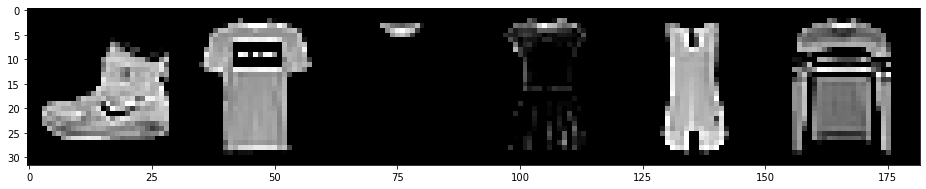

In [157]:
import torchvision

dataiter = iter(test_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images[:6]))

In [160]:
outputs = net(images)

_ , predicted = torch.max(outputs, 1)
print(predicted)

tensor([9, 0, 0, 0, 3, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 0, 0, 2, 4, 3, 0, 8, 8,
        4, 3, 0, 2, 4, 4, 5, 3, 4, 4, 0, 8, 5, 0, 0, 4, 2, 7, 9, 5, 5, 2, 7, 3,
        0, 3, 3, 3, 7, 2, 2, 0, 0, 8, 3, 3, 5, 0, 5, 5, 0, 2, 0, 0, 4, 0, 0, 0,
        0, 3, 0, 4, 4, 0, 0, 9, 0, 3, 5, 7, 9, 7, 0, 7, 9, 7, 7, 3, 0, 9, 3, 2,
        4, 0, 0, 8, 8, 3, 0, 0, 2, 8, 0, 9, 7, 8, 8, 9, 4, 3, 3, 0, 5, 4, 4, 7,
        5, 5, 9, 2, 2, 2, 7, 0])


In [163]:
print(''.join('{}, '.format(labels_map[int(predicted[j].numpy())]) for j in range(6)))

Ankle Boot, T-Shirt, T-Shirt, T-Shirt, Dress, Pullover, 


In [165]:
correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _ , predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(100 * correct / total)

70.92333333333333
